# 시각화 - Youtube Ranking Data

In [1]:
# 한글 사용
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family = 'NanumBarunGothic')

In [2]:
# 파일 업로드
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving 유튜브_순위(210818).csv to 유튜브_순위(210818).csv


In [3]:
df = pd.read_csv(filename)
df.head()

,카테고리,채널명,구독자수,조회수,게시물수
0,음악/댄스/가수,BLACKPINK,"64,000,000","19,003,810,000",371
1,음악/댄스/가수,HYBE LABELS,"60,300,000","18,713,050,000",654
2,음악/댄스/가수,BANGTANTV,"56,400,000","12,194,960,000","1,579"
3,음악/댄스/가수,SMTOWN,"28,500,000","21,870,920,000","3,729"
4,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223


In [4]:
# str(구독자수) --> int(구독자수2)
df['구독자수2'] = df.구독자수.apply(lambda x: int(x.replace(',','')))
df.head()

,카테고리,채널명,구독자수,조회수,게시물수,구독자수2
0,음악/댄스/가수,BLACKPINK,"64,000,000","19,003,810,000",371,64000000
1,음악/댄스/가수,HYBE LABELS,"60,300,000","18,713,050,000",654,60300000
2,음악/댄스/가수,BANGTANTV,"56,400,000","12,194,960,000","1,579",56400000
3,음악/댄스/가수,SMTOWN,"28,500,000","21,870,920,000","3,729",28500000
4,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223,26500000


In [5]:
def str2int(x):
    return int(x.replace(',',''))

In [6]:
df['게시물수2'] = df.게시물수.apply(str2int)
df.head()

,카테고리,채널명,구독자수,조회수,게시물수,구독자수2,게시물수2
0,음악/댄스/가수,BLACKPINK,"64,000,000","19,003,810,000",371,64000000,371
1,음악/댄스/가수,HYBE LABELS,"60,300,000","18,713,050,000",654,60300000,654
2,음악/댄스/가수,BANGTANTV,"56,400,000","12,194,960,000","1,579",56400000,1579
3,음악/댄스/가수,SMTOWN,"28,500,000","21,870,920,000","3,729",28500000,3729
4,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223,26500000,223


게시물수 Top20 (채널명, 게시물수) Bar Plot

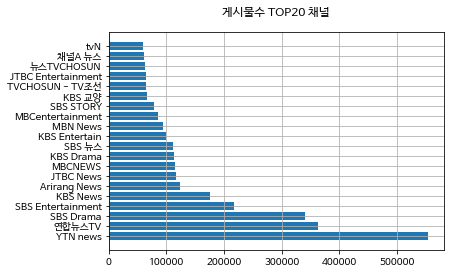

In [7]:
df2 = df.sort_values(by='게시물수2', ascending=False).head(20)
plt.barh(df2['채널명'], df2['게시물수2'])
plt.title('게시물수 TOP20 채널', y=1.05)
plt.grid()
plt.show()

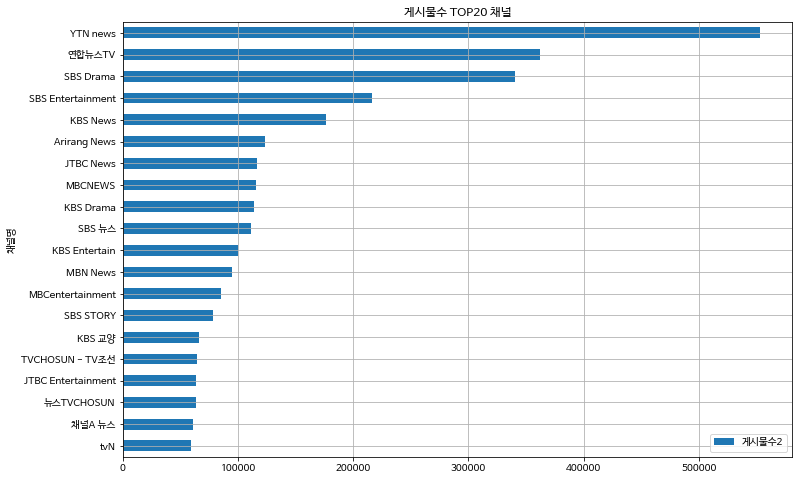

In [8]:
df2 = df[['채널명', '게시물수2']].sort_values(by='게시물수2', ascending=False)
df2.set_index('채널명', inplace=True)
df2.head(20).sort_values(by='게시물수2').plot(kind='barh', grid=True, figsize=(12,8))
plt.title('게시물수 TOP20 채널')
plt.show()

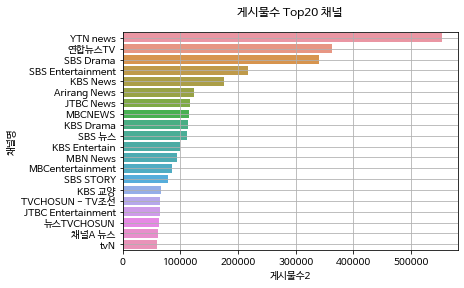

In [9]:
import seaborn as sns
df2 = df[['채널명', '게시물수2']].sort_values(by='게시물수2', ascending=False)
sns.barplot(y='채널명', x='게시물수2', data=df2.head(20))
plt.title('게시물수 Top20 채널', y=1.05)
plt.grid()
plt.show()